# Machine Learning

Before providing outputs, a model needs to be trained, for which we need:

-   Data
-   Model
-   Objective Function
-   Optimization Algorithm

3 Types of Machine Learning

-   Supervised: Has labeled Data and Target outputs.

    There are 2 types: Classification and Regression

-   Unsupervised: Non labeled data, tries to find patters and logic on the data to create categories
-   Reinforcement: Consits on rewarding the algorithm based on its achievements

## Linear Model 

The simplest model

$y = ax +b$

$weight = inputs * outputs$ and do not depend on the number of observations

### Objective Functions

Measures how well our model's outputs match the targets

-   Loss Functios (or Cost Functions)
-   Reward Functions

### Regression Fuctions:

Outputs Numbers

Loss Function:

    L2-Norm = OLS in statistics

$\sum_{i}=(y_{i}-t_{i})^{2}$

### Classification Fuctions:

Outputs Categories
(dummy variables are created to turn the categories into numerical data (0's and 1's) so that the algorithm can calculate them)

Loss Function:

    Cross Entropy loss

### Gradient Descent

Is a mathematical term. It is the multivarivative generalization of the derivative concept

Is a type of optimization Algorithm in which the learning rate equals the greek letter 'eta' $= \eta$

A high learning rate is faster but may not reach the minimum, whereas a smaller one is slower but will most certainly reach the minimum

### Pratical Example

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

    Generating random input data

For real cases we would already have real and meaningful data to import, this is just for showcasing the methodology

In [2]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1)) #(lowest point, highest point, interval)
zs = np.random.uniform(-10,10,(observations,1)) #the variables do not need to be declared, just specified in the correct order

inputs = np.column_stack((xs,zs)) #combining xs and zs
inputs.shape

(1000, 2)

Creating the targets

! Real data always contains noise

We may change the values on the target fuction in any way we wish, the algorithm will still work the same

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

# arbitrary target function 
targets = 2*xs-3*zs+5+noise # the noise is to add a little of randomization to the data so it wont be perfect

targets.shape

(1000, 1)

Inicializing variables

In [4]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1)

print(weights,biases)


[[-0.00771588]
 [ 0.02299329]] [0.09931655]


Setting a learning rate

In [5]:
learning_rate = 0.001

Training the model

w = weight

$w_{i+1}=w_{i}-\eta \nabla_{w} L(y,t)$

b = biases

$b_{i+1}=b_{i}-\eta \nabla_{b} L(y,t)$

L(y,t) => Loss function

where y = outputs, t = targets

In [6]:
for i in range(10000):
    outputs = np.dot(inputs,weights) + biases #np.dot = scalar multiplication of matrices
    deltas = outputs-targets

    loss = np.sum(deltas**2)/2/observations # this will return the average loss by 

    print(loss) # if it decreases with each iteration, it means the algorithm is improving

    deltas_scaled =deltas/observations

    weights = weights-learning_rate*np.dot(inputs.T,deltas_scaled) #the inputs are being transposed to respect the matrices multiplication rules
    biases =  biases-learning_rate*np.sum(deltas_scaled)

223.28225296525025
210.02232541736595
197.5921225902183
185.9396267293468
175.0160821442335
164.77579059209873
155.17591949976728
146.1763222178964
137.7393695524371
129.8297918656039
122.41453108305673
115.46260198563448
108.94496220300437
102.83439036316335
97.10537188600371
91.73399194128028
86.69783512142268
81.97589140785374
77.54846803592002
73.39710688832605
69.50450707019138
65.85445234062222
62.43174309609105
59.22213262004248
56.21226733106459
53.389630778763326
50.74249115221998
48.25985208066651
45.93140651984222
43.74749353045541
41.69905776732105
39.777611509129564
37.97519906947215
36.28436343974821
34.698115023952965
33.20990233412775
31.813584523488505
30.50340564196444
29.273970506110366
28.120222082135257
27.03742028714141
26.021122119623506
25.067163035856804
24.171639494034327
23.330892592914722
22.54149273633721
21.80022525926581
21.10407695506146
20.450223447462875
19.836017354302864
19.25897719330907
18.71677698345331
18.207236498231868
17.728312129995782
17.278

The objective is to make the weight and biases match the values on the target function that generated the linear model

$targets = 2*xs-3*zs+5+noise$  

2, -3 and 5 respectivelly, the more we iterate above loop, the closer it gets to the target values

In [7]:
print(weights,biases)

[[ 1.99954339]
 [-2.99669814]] [4.99563076]


Plot outputs vs targets

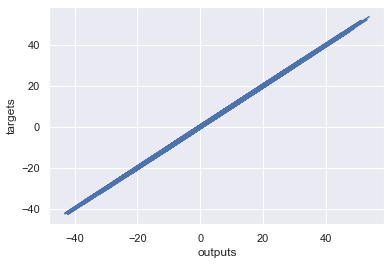

In [9]:
plt.plot(outputs,targets) #since the line is at a perfect 45º angle, we know the model fits the data and the linear regression
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()